# Data Mining - Tugas Akhir - Kelompok "Gempa"
| Nama Anggota | NPM |
| :- | :- |
| Kevin Prawira | 180619685 |
| Muhammad Yunus | 1806232130 |
| Naila Kamila | 1806147571 |
| Natasha Latifatu Soliha | 1806193395 |
| Rifqi Wazirsyah | 1806144531 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
import json
import re
import datetime
from tqdm import tqdm
import matplotlib.dates as mdates
from wordcloud import WordCloud
import matplotlib.patches as mpatches
import seaborn as sns
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from urllib.request import urlopen

C:\Users\Kevin Prawira\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In C:\Users\Kevin Prawira\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Kevin Prawira\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Kevin Prawira\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Kevin Prawira\Anaconda3\lib\site

# Import Data

In [2]:
data = pd.read_csv('databaru.csv')

<b> Berikut cuplikan data yang akan digunakan, diambil dari file .json </b>

In [3]:
data.head()

created_at                   id               id_str  \
0  Tue Dec 14 15:52:18 +0000 2021  1470783716444278784  1470783716444278784   
1  Tue Dec 14 15:51:49 +0000 2021  1470783596852088842  1470783596852088842   
2  Tue Dec 14 15:51:43 +0000 2021  1470783571736604678  1470783571736604678   
3  Tue Dec 14 15:51:35 +0000 2021  1470783537053933568  1470783537053933568   
4  Tue Dec 14 15:50:43 +0000 2021  1470783317003976704  1470783317003976704   

                                           full_text  truncated  \
0  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...      False   
1  @butjiners Yang di NTT noh gempa pada sakit bl...      False   
2  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...      False   
3                          @mbakhutao Gempa aman ga?      False   
4           Ternyata, gempa tadi berasa ampe kesini.      False   

  display_text_range                                           entities  \
0            [0, 98]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [11, 55]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2            [0, 94]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3           [11, 25]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4            [0, 40]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                            metadata  \
0  {'iso_language_code': 'in', 'result_type': 're...   
1  {'iso_language_code': 'in', 'result_type': 're...   
2  {'iso_language_code': 'in', 'result_type': 're...   
3  {'iso_language_code': 'in', 'result_type': 're...   
4  {'iso_language_code': 'in', 'result_type': 're...   

                                              source  in_reply_to_status_id  \
0  <a href="https://www.echobox.com" rel="nofollo...                    NaN   
1  <a href="http://twitter.com/download/android" ...           1.470632e+18   
2  <a href="https://gontornews.com" rel="nofollow...                    NaN   
3  <a href="http://twitter.com/download/android" ...           1.470772e+18   
4  <a href="http://twitter.com/download/android" ...                    NaN   

   ...  retweet_count  favorite_count  favorited retweeted possibly_sensitive  \
0  ...              0               0      False     False              False   
1  ...              0               0      False     False                NaN   
2  ...              0               0      False     False              False   
3  ...              0               0      False     False                NaN   
4  ...              0               0      False     False                NaN   

  lang                                  extended_entities quoted_status_id  \
0   in                                                NaN              NaN   
1   in                                                NaN              NaN   
2   in  {'media': [{'id': 1470783569857556492, 'id_str...              NaN   
3   in                                                NaN              NaN   
4   in                                                NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  
3                   NaN            NaN  
4                   NaN            NaN  

[5 rows x 30 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74048 entries, 0 to 74047
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 74048 non-null  object 
 1   id                         74048 non-null  int64  
 2   id_str                     74048 non-null  int64  
 3   full_text                  74048 non-null  object 
 4   truncated                  74048 non-null  bool   
 5   display_text_range         74048 non-null  object 
 6   entities                   74048 non-null  object 
 7   metadata                   74048 non-null  object 
 8   source                     74048 non-null  object 
 9   in_reply_to_status_id      19740 non-null  float64
 10  in_reply_to_status_id_str  19740 non-null  float64
 11  in_reply_to_user_id        20359 non-null  float64
 12  in_reply_to_user_id_str    20359 non-null  float64
 13  in_reply_to_screen_name    19981 non-null  obj

Pada data, terlihat terdapat 74048 tweet, dengan 30 kolom yang dimiliki. Kelompok kami memutuskan hanya akan menggunakan beberapa kolom saja dari data ini yaitu kolom
1. `created_at` sebagai timestamp dari tweet
2. `id_str` sebagai identifier unik dari sebuah tweet
3. `full_text` sebagai isi tweet
4. `retweet_count` sebagai banyaknya retweet pada tweet
5. `favorite_count` sebagai banyaknya likes pada tweet
6. `user` yaitu sebagai informasi user yang melakukan tweet

Perlu diperhatikan bahwa sebenarnya kolom `user` yang memuat informasi user masih berbentuk string, padahal seharusnya anggota kolom ini merupakan dictionary. sehingga format tersebut harus kita ubah terlebih dahulu.

In [5]:
data['user']

0        {'id': 48890883, 'id_str': '48890883', 'name':...
1        {'id': 1405789177065525253, 'id_str': '1405789...
2        {'id': 214805603, 'id_str': '214805603', 'name...
3        {'id': 1292086530345799680, 'id_str': '1292086...
4        {'id': 1296258992075706368, 'id_str': '1296258...
                               ...                        
74043    {'id': 966983910788759553, 'id_str': '96698391...
74044    {'id': 3550695012, 'id_str': '3550695012', 'na...
74045    {'id': 614418426, 'id_str': '614418426', 'name...
74046    {'id': 1139341967995752448, 'id_str': '1139341...
74047    {'id': 1248255233433546754, 'id_str': '1248255...
Name: user, Length: 74048, dtype: object

In [6]:
type(data['user'][0])

str

In [7]:
#uabh menjadi dictionary
data['user'] = data['user'].apply(lambda x: eval(x))

In [8]:
type(data['user'][0])

dict

Sekarang anggota kolom `user` sudah berubah menjadi dictionary. akan dilihat kolom apa saja yang terdapat pada dictionary ini

In [9]:
user = data['user'].to_list()
user = pd.DataFrame(user)

In [10]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74048 entries, 0 to 74047
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  74048 non-null  int64 
 1   id_str                              74048 non-null  object
 2   name                                74048 non-null  object
 3   screen_name                         74048 non-null  object
 4   location                            74048 non-null  object
 5   description                         74048 non-null  object
 6   url                                 39365 non-null  object
 7   entities                            74048 non-null  object
 8   protected                           74048 non-null  bool  
 9   followers_count                     74048 non-null  int64 
 10  friends_count                       74048 non-null  int64 
 11  listed_count                        74048 non-null  in

Pada dictionary ini, kelompok kami memutuskan akan mengamil beberapa kolom saja, yaitu
1. `screen_name` sebagai username akun yang melakukan tweet
2. `location` sebagai informasi lokasi yang tertera pada bio akun
3. `followers_count` sebagai informasi banyaknya followers akun yang melakukan tweet
4. `verified` sebagai penanda apakah akun yang melakukan tweet merupakan akun verified atau tidak

sehingga data yang kita punya akan kita tarik dari `data` dan `user` dan akan kita gabungkan sebagai berikut

In [11]:
column = ['created_at','id_str','full_text','retweet_count','favorite_count']
karakter_user = ['screen_name', 'location', 'followers_count', 'verified']
user = user[karakter_user]
data2 = data[column]
df = pd.concat([data2,user], axis = 1)

In [12]:
df.head()

created_at               id_str  \
0  Tue Dec 14 15:52:18 +0000 2021  1470783716444278784   
1  Tue Dec 14 15:51:49 +0000 2021  1470783596852088842   
2  Tue Dec 14 15:51:43 +0000 2021  1470783571736604678   
3  Tue Dec 14 15:51:35 +0000 2021  1470783537053933568   
4  Tue Dec 14 15:50:43 +0000 2021  1470783317003976704   

                                           full_text  retweet_count  \
0  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...              0   
1  @butjiners Yang di NTT noh gempa pada sakit bl...              0   
2  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...              0   
3                          @mbakhutao Gempa aman ga?              0   
4           Ternyata, gempa tadi berasa ampe kesini.              0   

   favorite_count    screen_name         location  followers_count  verified  
0               0  1nserttranstv                            889797     False  
1               0   Thaharizieq3  legok,tangerang                6     False  
2               0     gontornews        Indonesia             5528     False  
3               0       ckdlfemm           He/Him               51     False  
4               0    siemplicity        Verheven.              346     False

# Preprocessing

Hal pertama yang akan diperiksa adalah banyaknya tweet <b> duplicate </b> pada data. Akan digunakan identifier `id_str` untuk menandakan tweet tersebut duplicate atau tidak.

Karena satu tweet hanya memiliki satu `id_str` sebagai identifier dari tweet tersebut

In [13]:
print("banyaknya tweet yang duplicate: {} tweet ({}%)".format(df['id_str'].duplicated().sum(),
                                                              round(df['id_str'].duplicated().sum()/len(df)*100)))
print('tweet tidak duplicate: {} tweet'.format(len(df) - df['id_str'].duplicated().sum()))

banyaknya tweet yang duplicate: 54397 tweet (73%)
tweet tidak duplicate: 19651 tweet


In [14]:
df.drop_duplicates(subset=['id_str'], inplace = True)

In [15]:
df.duplicated().sum()

0

In [16]:
len(df)

19651

Sekarang telah diperoleh 19651 tweet unik. lalu sekarang akan dicek adanya <b> missing values </b>.

In [17]:
df.isnull().sum()

created_at         0
id_str             0
full_text          0
retweet_count      0
favorite_count     0
screen_name        0
location           0
followers_count    0
verified           0
dtype: int64

walaupun dicek tidak ada missing values, sebenarnya terdapat missing values pada data ini yaitu pada kolom `location`. Missing values pada kolom `location` masih  direpresentasikan dengan <b> white space </b> bukan NaN, seperti yang terlihat pada observasi 1 pada `df.head()`.

oleh karenanya, white space pada data akan diganti dengan missing values

In [18]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [19]:
df.isnull().sum()

created_at            0
id_str                0
full_text             0
retweet_count         0
favorite_count        0
screen_name           0
location           6005
followers_count       0
verified              0
dtype: int64

Ternyata pada kolom `location` terdapat missing value sebanyak 6005, dikarenakan banyak username yang tidak mengisi location mereka pada bio akun mereka. kolom ini akan diimputasi menggunakan "Indonesia".

In [20]:
df['location'].fillna("Indonesia", inplace = True)

In [21]:
df.isnull().sum()

created_at         0
id_str             0
full_text          0
retweet_count      0
favorite_count     0
screen_name        0
location           0
followers_count    0
verified           0
dtype: int64

Sekarang sudah tidak ada missing value pada data. preprocessing akan dilanjutkan dengan mengurai timestamp pada kolom `created_at` menjadi <b> 2 kolom baru </b>, yaitu `date` dan `time`

In [22]:
df.head()

created_at               id_str  \
0  Tue Dec 14 15:52:18 +0000 2021  1470783716444278784   
1  Tue Dec 14 15:51:49 +0000 2021  1470783596852088842   
2  Tue Dec 14 15:51:43 +0000 2021  1470783571736604678   
3  Tue Dec 14 15:51:35 +0000 2021  1470783537053933568   
4  Tue Dec 14 15:50:43 +0000 2021  1470783317003976704   

                                           full_text  retweet_count  \
0  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...              0   
1  @butjiners Yang di NTT noh gempa pada sakit bl...              0   
2  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...              0   
3                          @mbakhutao Gempa aman ga?              0   
4           Ternyata, gempa tadi berasa ampe kesini.              0   

   favorite_count    screen_name         location  followers_count  verified  
0               0  1nserttranstv        Indonesia           889797     False  
1               0   Thaharizieq3  legok,tangerang                6     False  
2               0     gontornews        Indonesia             5528     False  
3               0       ckdlfemm           He/Him               51     False  
4               0    siemplicity        Verheven.              346     False

In [23]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['timestamp'] = df['created_at'].dt.time
df.drop(columns = ['created_at'], inplace = True)

In [24]:
df.head()

id_str                                          full_text  \
0  1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1  1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2  1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3  1470783537053933568                          @mbakhutao Gempa aman ga?   
4  1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   

   retweet_count  favorite_count    screen_name         location  \
0              0               0  1nserttranstv        Indonesia   
1              0               0   Thaharizieq3  legok,tangerang   
2              0               0     gontornews        Indonesia   
3              0               0       ckdlfemm           He/Him   
4              0               0    siemplicity        Verheven.   

   followers_count  verified        date timestamp  
0           889797     False  2021-12-14  15:52:18  
1                6     False  2021-12-14  15:51:49  
2             5528     False  2021-12-14  15:51:43  
3               51     False  2021-12-14  15:51:35  
4              346     False  2021-12-14  15:50:43

Selanjutnya akan dibentuk <b> 1 kolom baru </b> bernama `mention`, dimana akan bernilai benar jika pada tweet terdapat mention ke orang lain (karena mention ini nantinya akan dibuang) sebagai bentuk preprocessing tweet

In [25]:
df['mention'] = np.where(df['full_text'].str.contains('\@[a-zA-Z0-9_.-]*'), True, False)

In [26]:
df.head()

id_str                                          full_text  \
0  1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1  1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2  1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3  1470783537053933568                          @mbakhutao Gempa aman ga?   
4  1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   

   retweet_count  favorite_count    screen_name         location  \
0              0               0  1nserttranstv        Indonesia   
1              0               0   Thaharizieq3  legok,tangerang   
2              0               0     gontornews        Indonesia   
3              0               0       ckdlfemm           He/Him   
4              0               0    siemplicity        Verheven.   

   followers_count  verified        date timestamp  mention  
0           889797     False  2021-12-14  15:52:18    False  
1                6     False  2021-12-14  15:51:49     True  
2             5528     False  2021-12-14  15:51:43    False  
3               51     False  2021-12-14  15:51:35     True  
4              346     False  2021-12-14  15:50:43    False

Selanjutnya akan dibentuk <b> 1 kolom baru </b> bernama `engangement`, dimana merupakan jumlahan antara `retweet_count` dan `favorite_count`

In [27]:
df['engangement'] = df['retweet_count'] + df['favorite_count']

In [28]:
df.head()

id_str                                          full_text  \
0  1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1  1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2  1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3  1470783537053933568                          @mbakhutao Gempa aman ga?   
4  1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   

   retweet_count  favorite_count    screen_name         location  \
0              0               0  1nserttranstv        Indonesia   
1              0               0   Thaharizieq3  legok,tangerang   
2              0               0     gontornews        Indonesia   
3              0               0       ckdlfemm           He/Him   
4              0               0    siemplicity        Verheven.   

   followers_count  verified        date timestamp  mention  engangement  
0           889797     False  2021-12-14  15:52:18    False            0  
1                6     False  2021-12-14  15:51:49     True            0  
2             5528     False  2021-12-14  15:51:43    False            0  
3               51     False  2021-12-14  15:51:35     True            0  
4              346     False  2021-12-14  15:50:43    False            0

### Selanjutnya, akan dilakukan <b>preprocessing pada data text </b>

In [29]:
df['text'] = df['full_text'].copy()

#### 1. Buat semua menjadi huruf kecil dan buang \n

In [30]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: x.replace('\n',' '))

Hal ini dilakukan agar semua baris enter \n tidak menggangu teks

#### 2. Buang mention, link, enter dan hashtag

In [31]:
df['text'] = df['text'].apply(lambda x: re.sub(r'@\S+','',x))
df['text'] = df['text'].apply(lambda x: re.sub(r'https?://\S+','',x))
df['text'] = df['text'].apply(lambda x: re.sub(r'#\S+','',x))

hal ini dilakukan karena dirasa mention terhadap orang tidak memiliki arti yang dapat dipahami oleh komputer sehingga hal tersebut dapat dibuang

Link juga tidak memberikan arti apa-apa dalam kalimat sehingga dapat dibuang

serta hashtag juga tidak terlalu memberikan arti yang signifikan karena, penggambaran inti tweet seharusnya sudah tergambarkan pada tweet sehingga penambahan hashtag tidak terlalu menguatkan konteks kalimat. lagipula pada twitter banyak yang menyalahgunakan hashtag sebagai panjat sosial sehingga, seringkali hashtag yang digunakan tidak sesuai dengan konteks tweet yang dibicarakan

#### 3. Ganti slang words (kata "alay" serta bahasa gaul)

Kami juga perlu melakukan pembersihan pada kata-kata gaul yang digunakan. Perlu diingat, sering sekali kita menggunakan kata-kata singkatan pada media sosial kita, karena platform tersebut merupakan platform non-formal. sehingga untuk membantu memahami konteks asli, kita perlu mengganti kata2 singkatan menjadi kata aslinya. atau bisa juga mengatasi kata-kata typo yang salah diketik

Ada 2 sumber yang kami gunakan sebagai referensi, yaitu <a href="https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic" target="_blank">dictionary slangwords</a> yang dimiliki oleh tau-data indonesia, serta kamus alay oleh Github @nasalsabila <a href="https://github.com/nasalsabila/kamus-alay/" target="_blank">disini</a>

In [32]:
import requests
url = 'https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic'
page = requests.get(url)
page = page.text
page = page.replace('\n','')
slangwords = json.loads(page)

In [33]:
slangwords

{'1pun': 'satupun',
 '7an': 'tujuan',
 'Dr.': 'doktor',
 'dr.': 'dokter',
 'drg.': 'dokter gigi',
 'Jkt': 'Jakarta',
 'Jkw': 'jokowi',
 'Napza': 'narkoba psikotropika dan zat adiktif',
 'Nasihat': 'nasehat',
 'ababil': 'abg labil',
 'abis': 'habis',
 'acc': 'accord',
 'accord': 'sesuai',
 'ad': 'ada',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'administ': 'administrasi',
 'adoh': 'aduh',
 'afaik': 'as far as i know',
 'agma': 'agama',
 'aha': 'tertawa',
 'ahaha': 'haha',
 'ahiok': 'ahok',
 'mehong': 'mahal',
 'ahoax': 'ahok',
 'ahokncc': 'ahok',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajak2': 'ajak-ajak',
 'ajep-ajep': 'dunia gemerlap',
 'ajj': 'saja',
 'ak': 'aku',
 'aka': 'dikenal juga sebagai',
 'akherat': 'akhirat',
 'akhirx': 'akhirnya',
 'akika': 'aku',
 'akko': 'aku',
 'akkoh': 'aku',
 'akku': 'aku',
 'akn': 'akan',
 'aktifis2': 'aktivis-aktivis',
 'aktivi': 'aktivis',
 'aktivis2': 'aktivis-aktivis',
 'akun2': 'akun-akun',
 'akuwh': 'aku',
 'akyu': 'aku'

In [34]:
pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in slangwords.keys()) + r')(?!\w)')
df['text'] = df['text'].apply(lambda y: pattern.sub(lambda x: slangwords[x.group()], y))

Selain slangwords yang disediakan oleh tau-data, kami juga memakai konversi slangwords yang disediakan oleh Github @nasalsabila <a href="https://github.com/nasalsabila/kamus-alay/" target="_blank">disini</a>

In [35]:
kamus_alay = pd.read_csv('colloquial-indonesian-lexicon.csv')
kamus_alay = kamus_alay[['slang','formal']]
kamus_alay.drop_duplicates('slang', inplace = True)
kamus_alay = dict(kamus_alay.values)

In [36]:
pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in kamus_alay.keys()) + r')(?!\w)')
df['text'] = df['text'].apply(lambda y: pattern.sub(lambda x: kamus_alay[x.group()], y))

Sebelum dibersihkan

In [37]:
df['full_text'][1351]

'mark, doyoung dan johnny di igs nya minta maaf karna tentang gempa di jeju, sy gak tau kenapa sih karena sy gak nonton full bgt di live. kaya nya mereka gak tau kalau itu alarm gempa.'

Sesudah dibersihkan

In [38]:
df['text'][1351]

'mark, doyoung dan johnny di igs nya meminta maaf karena tentang gempa di jeju, saya tidak tahu kenapa sih karena saya tidak menonton full banget di live. kayak nya mereka tidak tahu kalau itu alarm gempa.'

beberapa perubahan yang terjadi adalah,

karna menjadi karena <br>
sy menjadi saya <br>
gak menjadi tidak dan sebagainya

In [39]:
df

id_str                                          full_text  \
0      1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1      1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2      1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3      1470783537053933568                          @mbakhutao Gempa aman ga?   
4      1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   
...                    ...                                                ...   
73547  1470890389787660291  #gempa\n#banjir \nBencana terus melanda Indone...   
73550  1470886141175889921  Pagi nitip tt yah Ahok, sedih denger #gempa se...   
73551  1470885246253993986  Stay safe Indonesia, terutama Indonesia bagian...   
73573  1470866239404740610  3/4 INDONESIA \n\nini tanah SYIAH baik baik .....   
73636  1470726555080871937  Detik- detik Gempa Guncang Maumere - CNN Indon...   

       retweet_count  favorite_count    screen_name  \
0                  0               0  1nserttranstv   
1                  0               0   Thaharizieq3   
2                  0               0     gontornews   
3                  0               0       ckdlfemm   
4                  0               0    siemplicity   
...              ...             ...            ...   
73547              7              26    refrizalskb   
73550              0               0  sadewi_haidar   
73551              0               1     Miguuumigu   
73573              0               0      kodok_007   
73636              0               0    HiPeople_21   

                             location  followers_count  verified        date  \
0                           Indonesia           889797     False  2021-12-14   
1                     legok,tangerang                6     False  2021-12-14   
2                           Indonesia             5528     False  2021-12-14   
3                              He/Him               51     False  2021-12-14   
4                           Verheven.              346     False  2021-12-14   
...                               ...              ...       ...         ...   
73547  Indonesia | refrizal@dpr.go.id            31476     False  2021-12-14   
73550         Bekasi Barat, Indonesia             3551     False  2021-12-14   
73551                      EXO PLANET              101     False  2021-12-14   
73573                   djember city                47     False  2021-12-14   
73636                          Italia              264     False  2021-12-14   

      timestamp  mention  engangement  \
0      15:52:18    False            0   
1      15:51:49     True            0   
2      15:51:43    False            0   
3      15:51:35     True            0   
4      15:50:43    False            0   
...         ...      ...          ...   
73547  22:56:11    False           33   
73550  22:39:18    False            0   
73551  22:35:45    False            1   
73573  21:20:13    False            0   
73636  12:05:10    False            0   

                                                    text  
0      berlibur di lombok saat gempa, teuku wisnu dan...  
1           yang di ntt noh gempa pada sakit blokkkkkkkk  
2      butuh bantuan segera: act ajak peduli korban g...  
3                                      gempa aman tidak?  
4             ternyata, gempa tadi berasa sampai kesini.  
...                                                  ...  
73547     bencana terus melanda indonesia. marilah ki...  
73550  pagi nitip tt ya ahok, sedih dengar  semoga in...  
73551  stay safe indonesia, terutama indonesia bagian...  
73573  3/4 indonesia   ini tanah syiah baik baik ... ...  
73636  detik- detik gempa guncang maumere - cnn indon...  

[19651 rows x 13 columns]

#### 4. Buang tanda baca

Tanda baca juga perlu dibuang, karena tanda baca tidak memberikan arti pada kalimat

In [40]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]','', x))

In [41]:
df

id_str                                          full_text  \
0      1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1      1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2      1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3      1470783537053933568                          @mbakhutao Gempa aman ga?   
4      1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   
...                    ...                                                ...   
73547  1470890389787660291  #gempa\n#banjir \nBencana terus melanda Indone...   
73550  1470886141175889921  Pagi nitip tt yah Ahok, sedih denger #gempa se...   
73551  1470885246253993986  Stay safe Indonesia, terutama Indonesia bagian...   
73573  1470866239404740610  3/4 INDONESIA \n\nini tanah SYIAH baik baik .....   
73636  1470726555080871937  Detik- detik Gempa Guncang Maumere - CNN Indon...   

       retweet_count  favorite_count    screen_name  \
0                  0               0  1nserttranstv   
1                  0               0   Thaharizieq3   
2                  0               0     gontornews   
3                  0               0       ckdlfemm   
4                  0               0    siemplicity   
...              ...             ...            ...   
73547              7              26    refrizalskb   
73550              0               0  sadewi_haidar   
73551              0               1     Miguuumigu   
73573              0               0      kodok_007   
73636              0               0    HiPeople_21   

                             location  followers_count  verified        date  \
0                           Indonesia           889797     False  2021-12-14   
1                     legok,tangerang                6     False  2021-12-14   
2                           Indonesia             5528     False  2021-12-14   
3                              He/Him               51     False  2021-12-14   
4                           Verheven.              346     False  2021-12-14   
...                               ...              ...       ...         ...   
73547  Indonesia | refrizal@dpr.go.id            31476     False  2021-12-14   
73550         Bekasi Barat, Indonesia             3551     False  2021-12-14   
73551                      EXO PLANET              101     False  2021-12-14   
73573                   djember city                47     False  2021-12-14   
73636                          Italia              264     False  2021-12-14   

      timestamp  mention  engangement  \
0      15:52:18    False            0   
1      15:51:49     True            0   
2      15:51:43    False            0   
3      15:51:35     True            0   
4      15:50:43    False            0   
...         ...      ...          ...   
73547  22:56:11    False           33   
73550  22:39:18    False            0   
73551  22:35:45    False            1   
73573  21:20:13    False            0   
73636  12:05:10    False            0   

                                                    text  
0      berlibur di lombok saat gempa teuku wisnu dan ...  
1           yang di ntt noh gempa pada sakit blokkkkkkkk  
2      butuh bantuan segera act ajak peduli korban ge...  
3                                       gempa aman tidak  
4               ternyata gempa tadi berasa sampai kesini  
...                                                  ...  
73547     bencana terus melanda indonesia marilah kit...  
73550  pagi nitip tt ya ahok sedih dengar  semoga ind...  
73551  stay safe indonesia terutama indonesia bagian ...  
73573  34 indonesia   ini tanah syiah baik baik  hara...  
73636  detik detik gempa guncang maumere  cnn indones...  

[19651 rows x 13 columns]

Sebelum

In [42]:
df['full_text'][1351]

'mark, doyoung dan johnny di igs nya minta maaf karna tentang gempa di jeju, sy gak tau kenapa sih karena sy gak nonton full bgt di live. kaya nya mereka gak tau kalau itu alarm gempa.'

Sesudah

In [43]:
df['text'][1351]

'mark doyoung dan johnny di igs nya meminta maaf karena tentang gempa di jeju saya tidak tahu kenapa sih karena saya tidak menonton full banget di live kayak nya mereka tidak tahu kalau itu alarm gempa'

#### 5. Buang stopwords

Selanjutnya, kata sambung / stopwords juga harus dibuang, karena kata sambung ini tidak memberikan informasi besar terhadap konteks kalimat (bukan inti utama dari kalimat) sehingga dapat dibuang.

Sumber stopwords yang kami gunakan berasal dari list stopwords dari tau data indonesia <a href="https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt" target="_blank">disini</a>

In [464]:
url = 'https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt'
stopwords = urlopen(url).read().decode('utf-8')
stopwords = stopwords.split("\n")
stopwords.remove('tidak')
stopwords.remove('tidakkah')
stopwords.remove('tidaklah')

Tetapi pada hal ini, terdapat beberapa list stopwords yang kami buang, yaitu keberadaan kata `tidak`

hal ini dirasa dapat mengubah makna kalimat jika tidak dibuang (menjadi negasinya)

Contohnya pada tweet ke-4

gempa aman tidak

diubah menjadi

gempa aman

hal ini akan membuat informasi menjadi misleading, karena konteks kalimat adalah bertanya kondisi seseorang setelah gempa, apakah dia aman atau tidak?

tetapi jika dirubah, konteks kalimat akan menyatakan bahwa gempa aman, padahal bukan itu yang dimaksud pada tweet tersebut

In [465]:
stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [46]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

In [47]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [48]:
df.head()

id_str                                          full_text  \
0  1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1  1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2  1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3  1470783537053933568                          @mbakhutao Gempa aman ga?   
4  1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   

   retweet_count  favorite_count    screen_name         location  \
0              0               0  1nserttranstv        Indonesia   
1              0               0   Thaharizieq3  legok,tangerang   
2              0               0     gontornews        Indonesia   
3              0               0       ckdlfemm           He/Him   
4              0               0    siemplicity        Verheven.   

   followers_count  verified        date timestamp  mention  engangement  \
0           889797     False  2021-12-14  15:52:18    False            0   
1                6     False  2021-12-14  15:51:49     True            0   
2             5528     False  2021-12-14  15:51:43    False            0   
3               51     False  2021-12-14  15:51:35     True            0   
4              346     False  2021-12-14  15:50:43    False            0   

                                                text  
0         berlibur lombok gempa teuku wisnu keluarga  
1                    ntt noh gempa sakit blokkkkkkkk  
2  butuh bantuan act ajak peduli korban gempa mal...  
3                                   gempa aman tidak  
4                                gempa berasa kesini

hasil pembuangan stopwords

In [395]:
for i in range(50):
    print("sebelum \n", df['full_text'][i])
    print('sesudah \n', df['text'][i])
    print("\n")

sebelum 
 Berlibur di Lombok saat Gempa, Teuku Wisnu dan Keluarga Dalam Keadaan Baik https://t.co/4occQAlOug
sesudah 
 berlibur lombok gempa teuku wisnu keluarga


sebelum 
 @butjiners Yang di NTT noh gempa pada sakit blokkkkkkkk
sesudah 
 ntt noh gempa sakit blokkkkkkkk


sebelum 
 Butuh Bantuan Segera: ACT Ajak Peduli Korban Gempa Maluku Barat Daya - https://t.co/kwpcfRLr7f https://t.co/5XBIV8vwc2
sesudah 
 butuh bantuan act ajak peduli korban gempa maluku barat daya


sebelum 
 @mbakhutao Gempa aman ga?
sesudah 
 gempa aman tidak


sebelum 
 Ternyata, gempa tadi berasa ampe kesini.
sesudah 
 gempa berasa kesini


sebelum 
 Mana tadi gempa wkwk
sesudah 
 gempa tertawa


sebelum 
 @puanmaharani_ri Amin bu, semoga gak ada gempa susulan dan potensi tsunami hanya prediksi, stay save ya yg di NTT
sesudah 
 amin bu semoga tidak gempa susulan potensi tsunami prediksi stay save iya ntt


sebelum 
 Korea gempa?
sesudah 
 korea gempa


sebelum 
 @hilonjwin Pas live tadi sore ada alarm peringat

### Tokenizing Text

Pada bagian ini, akan dilakukan tokenizing pada kalimat yaitu pemecahan kata pada setiap kalimat sebagai langkah lanjutan dalam pembersihan data teks

Kami menggunakan bantuan package `nltk` untuk tokenizing

In [95]:
df['token'] = df['text'].apply(nltk.word_tokenize)

In [96]:
df.head()

id_str                                          full_text  \
0  1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1  1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2  1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3  1470783537053933568                          @mbakhutao Gempa aman ga?   
4  1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   

   retweet_count  favorite_count    screen_name         location  \
0              0               0  1nserttranstv        Indonesia   
1              0               0   Thaharizieq3  legok,tangerang   
2              0               0     gontornews        Indonesia   
3              0               0       ckdlfemm           He/Him   
4              0               0    siemplicity        Verheven.   

   followers_count  verified        date timestamp  mention  engangement  \
0           889797     False  2021-12-14  15:52:18    False            0   
1                6     False  2021-12-14  15:51:49     True            0   
2             5528     False  2021-12-14  15:51:43    False            0   
3               51     False  2021-12-14  15:51:35     True            0   
4              346     False  2021-12-14  15:50:43    False            0   

                                                text timeline  \
0         berlibur lombok gempa teuku wisnu keluarga    gempa   
1                    ntt noh gempa sakit blokkkkkkkk    gempa   
2  butuh bantuan act ajak peduli korban gempa mal...    gempa   
3                                   gempa aman tidak    gempa   
4                                gempa berasa kesini    gempa   

                                               token  
0  [berlibur, lombok, gempa, teuku, wisnu, keluarga]  
1              [ntt, noh, gempa, sakit, blokkkkkkkk]  
2  [butuh, bantuan, act, ajak, peduli, korban, ge...  
3                               [gempa, aman, tidak]  
4                            [gempa, berasa, kesini]

### Lemmatization

setelah dipecah menjadi frasa yang tepat, setiap frasa akan diubah menjadi bentuk dasar frasa tersebut (lemmatization) menggunakan package `sastrawi`

In [83]:
stemmer = StemmerFactory().create_stemmer()

In [97]:
df['lemmatize'] = df['token'].apply(lambda x: ' '.join([stemmer.stem(w) for w in x]))

In [98]:
df.head()

id_str                                          full_text  \
0  1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1  1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2  1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3  1470783537053933568                          @mbakhutao Gempa aman ga?   
4  1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   

   retweet_count  favorite_count    screen_name         location  \
0              0               0  1nserttranstv        Indonesia   
1              0               0   Thaharizieq3  legok,tangerang   
2              0               0     gontornews        Indonesia   
3              0               0       ckdlfemm           He/Him   
4              0               0    siemplicity        Verheven.   

   followers_count  verified        date timestamp  mention  engangement  \
0           889797     False  2021-12-14  15:52:18    False            0   
1                6     False  2021-12-14  15:51:49     True            0   
2             5528     False  2021-12-14  15:51:43    False            0   
3               51     False  2021-12-14  15:51:35     True            0   
4              346     False  2021-12-14  15:50:43    False            0   

                                                text timeline  \
0         berlibur lombok gempa teuku wisnu keluarga    gempa   
1                    ntt noh gempa sakit blokkkkkkkk    gempa   
2  butuh bantuan act ajak peduli korban gempa mal...    gempa   
3                                   gempa aman tidak    gempa   
4                                gempa berasa kesini    gempa   

                                               token  \
0  [berlibur, lombok, gempa, teuku, wisnu, keluarga]   
1              [ntt, noh, gempa, sakit, blokkkkkkkk]   
2  [butuh, bantuan, act, ajak, peduli, korban, ge...   
3                               [gempa, aman, tidak]   
4                            [gempa, berasa, kesini]   

                                           lemmatize  
0            libur lombok gempa teuku wisnu keluarga  
1                    ntt noh gempa sakit blokkkkkkkk  
2  butuh bantu act ajak peduli korban gempa malu ...  
3                                   gempa aman tidak  
4                                   gempa asa kesini

Terlihat beberapa kata sudah berubah menjadi bentuk aslinya, misalnya 

bantuan menjadi bantu <br>
berlibur menjadi libur <br>
dan sebagainya

# EDA

In [101]:
df.head()

id_str                                          full_text  \
0  1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1  1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2  1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3  1470783537053933568                          @mbakhutao Gempa aman ga?   
4  1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   

   retweet_count  favorite_count    screen_name         location  \
0              0               0  1nserttranstv        Indonesia   
1              0               0   Thaharizieq3  legok,tangerang   
2              0               0     gontornews        Indonesia   
3              0               0       ckdlfemm           He/Him   
4              0               0    siemplicity        Verheven.   

   followers_count  verified        date timestamp  mention  engangement  \
0           889797     False  2021-12-14  15:52:18    False            0   
1                6     False  2021-12-14  15:51:49     True            0   
2             5528     False  2021-12-14  15:51:43    False            0   
3               51     False  2021-12-14  15:51:35     True            0   
4              346     False  2021-12-14  15:50:43    False            0   

                                                text timeline  \
0         berlibur lombok gempa teuku wisnu keluarga    gempa   
1                    ntt noh gempa sakit blokkkkkkkk    gempa   
2  butuh bantuan act ajak peduli korban gempa mal...    gempa   
3                                   gempa aman tidak    gempa   
4                                gempa berasa kesini    gempa   

                                               token  \
0  [berlibur, lombok, gempa, teuku, wisnu, keluarga]   
1              [ntt, noh, gempa, sakit, blokkkkkkkk]   
2  [butuh, bantuan, act, ajak, peduli, korban, ge...   
3                               [gempa, aman, tidak]   
4                            [gempa, berasa, kesini]   

                                           lemmatize  
0            libur lombok gempa teuku wisnu keluarga  
1                    ntt noh gempa sakit blokkkkkkkk  
2  butuh bantu act ajak peduli korban gempa malu ...  
3                                   gempa aman tidak  
4                                   gempa asa kesini

<AxesSubplot:ylabel='verified'>

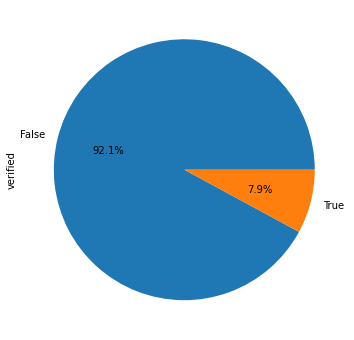

In [400]:
pie, ax = plt.subplots(figsize=[10,6])
df['verified'].value_counts().plot.pie(autopct="%.1f%%")

Banyaknya user verified pada data kami hanya sekitar 8% dari user keseluruhan. tetapi terdapat beberapa hal menarik mengenai behaviour dari akun verified yang kami analisa selanjutnya

<AxesSubplot:>

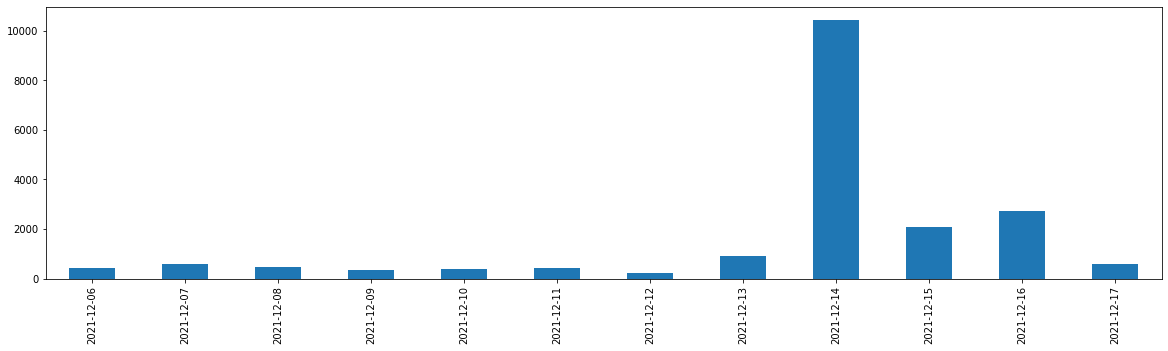

In [54]:
df['date'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize = (20,5))

In [55]:
(len(df[(df['date']==datetime.date(2021,12,14))]) - len(df[(df['date']==datetime.date(2021,12,13))])) / len(df[(df['date']==datetime.date(2021,12,13))])*100

1054.646017699115

Dapat dilihat dari bar chart di atas, terjadi lonjakan jumlah tweets pada tanggal 14 Desember 2021 sebesar 1054%, diduga karena terjadinya gempa di daerah Flores, Nusa Tenggara Timur. Hal ini diduga karena pada saat terjadinya gempa di Flores, kata “gempa” menjadi salah satu trending topic yang ada di twitter.

In [102]:
df.groupby('date').agg('sum')

id_str  retweet_count  favorite_count  followers_count  \
date                                                                       
2021-12-06  6.590481e+20          957.0          6297.0     4.642445e+07   
2021-12-07  8.838562e+20         1154.0          4269.0     1.098357e+08   
2021-12-08  7.151691e+20          516.0          2074.0     5.769022e+07   
2021-12-09  4.847365e+20          501.0          2412.0     3.609960e+07   
2021-12-10  5.612607e+20          691.0          3207.0     8.809665e+07   
2021-12-11  6.098890e+20          567.0          1674.0     1.027098e+08   
2021-12-12  3.439770e+20         1087.0          3814.0     8.696046e+07   
2021-12-13  1.329154e+21         3686.0         10098.0     1.462777e+08   
2021-12-14  1.535083e+22        57669.0        189785.0     2.778636e+09   
2021-12-15  3.057027e+21         6200.0         22138.0     7.665160e+08   
2021-12-16  4.027096e+21         3197.0         12437.0     8.071326e+08   
2021-12-17  8.756850e+20          335.0          1258.0     2.636267e+08   

            verified  mention  engangement  
date                                        
2021-12-06        16      187       7254.0  
2021-12-07        29      281       5423.0  
2021-12-08        20      193       2590.0  
2021-12-09         6      121       2913.0  
2021-12-10        19      151       3898.0  
2021-12-11        26      182       2241.0  
2021-12-12        24       86       4901.0  
2021-12-13        57      329      13784.0  
2021-12-14       816     3839     247454.0  
2021-12-15       228      640      28338.0  
2021-12-16       221      953      15634.0  
2021-12-17        91      161       1593.0

<AxesSubplot:xlabel='date'>

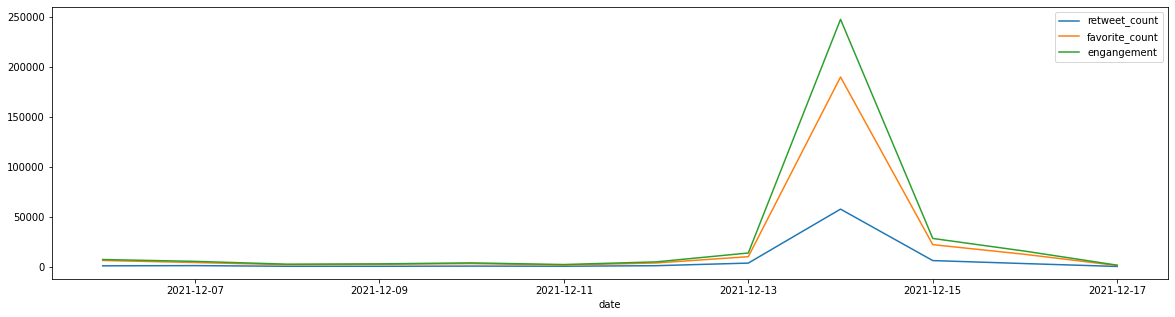

In [57]:
df.groupby('date').agg('sum')[['retweet_count','favorite_count','engangement']].plot(kind = "line", figsize = (20,5))

Terlihat bahwa volume tweet dan interaksi pada tanggal 14 merupakan nilai tertinggi dari semua tanggal. tetapi sebelum membahas hal tersebut, kelompok kami menemukan hal yang menarik mengenai hubungan antara banyaknya followers dan engagement yang didapatkan

In [103]:
per_akun = df.groupby('screen_name').agg('max')
per_akun

id_str  \
screen_name                          
0009_14        1470270479940292610   
002kiddos      1470694417245753346   
006fullsun     1470675509310746625   
00H43REN       1470272725327376387   
00HAECHANIE__  1470702092213911553   
...                            ...   
zyzy_wpp       1470702314000293896   
zzhchle        1470701287108866048   
zzhjsuh        1470751760125890561   
zzya02         1470711858692702213   
zzynellee      1470730949264433161   

                                                       full_text  \
screen_name                                                        
0009_14        lah gempa di mana aku yg sama sama jatim ga ke...   
002kiddos      @navinacy___ pas live tadi kan ada sirine buny...   
006fullsun          @wigglyjeno Di mana ada gempa? Stay safe, ya   
00H43REN                                   hah ada gempa dimana?   
00HAECHANIE__              @markiiyong KATANYA YG ADA GEMPA GITU   
...                                                          ...   
zyzy_wpp       @astxroidse mereka sempet nyanyi lagu gempa ka...   
zzhchle                  @nxvirgo karena salah ngira alarm gempa   
zzhjsuh        jujur gue masih khawatir sama masalah alarm ge...   
zzya02         @nctzenbase td waktu live ada pemberi tahuan k...   
zzynellee      @taeyongn yauda maaf ka gempa\ngua ga merhatii...   

               retweet_count  favorite_count              location  \
screen_name                                                          
0009_14                    0               0            stay · she   
002kiddos                  0               0               kwangya   
006fullsun                 0               0           haechan ace   
00H43REN                   0               0  ↳˳ ❝  08L  ᵕ̈  ೫˚ ∗:   
00HAECHANIE__              0               0               she/her   
...                      ...             ...                   ...   
zyzy_wpp                   0               1             Indonesia   
zzhchle                    0               0             Indonesia   
zzhjsuh                    0               0             Indonesia   
zzya02                     0               1             Indonesia   
zzynellee                  0               0               𝐒𝐀𝐑𝐂𝐀𝐒𝐔   

               followers_count  verified        date timestamp  mention  \
screen_name                                                               
0009_14                   1908     False  2021-12-13  05:52:53    False   
002kiddos                  427     False  2021-12-14  09:57:27     True   
006fullsun                 128     False  2021-12-14  08:42:19     True   
00H43REN                  1954     False  2021-12-13  06:01:48    False   
00HAECHANIE__             1750     False  2021-12-14  10:27:57     True   
...                        ...       ...         ...       ...      ...   
zyzy_wpp                  2368     False  2021-12-14  10:28:50     True   
zzhchle                   2333     False  2021-12-14  10:24:45     True   
zzhjsuh                   1099     False  2021-12-14  13:45:19    False   
zzya02                       2     False  2021-12-14  11:06:46     True   
zzynellee                  920     False  2021-12-14  12:22:37     True   

               engangement                                               text  \
screen_name                                                                     
0009_14                  0                      gempa jawa timur tidak kerasa   
002kiddos                0  pas live sirine bunyii sirine covid tidak sada...   
006fullsun               0                                gempa stay safe iya   
00H43REN                 0                                   hah gempa dimana   
00HAECHANIE__            0                                              gempa   
...                    ...                                                ...   
zyzy_wpp                 1  nyanyi lagu gempa alarm ngira kenaikan covid g...   
zzhchle                  0      

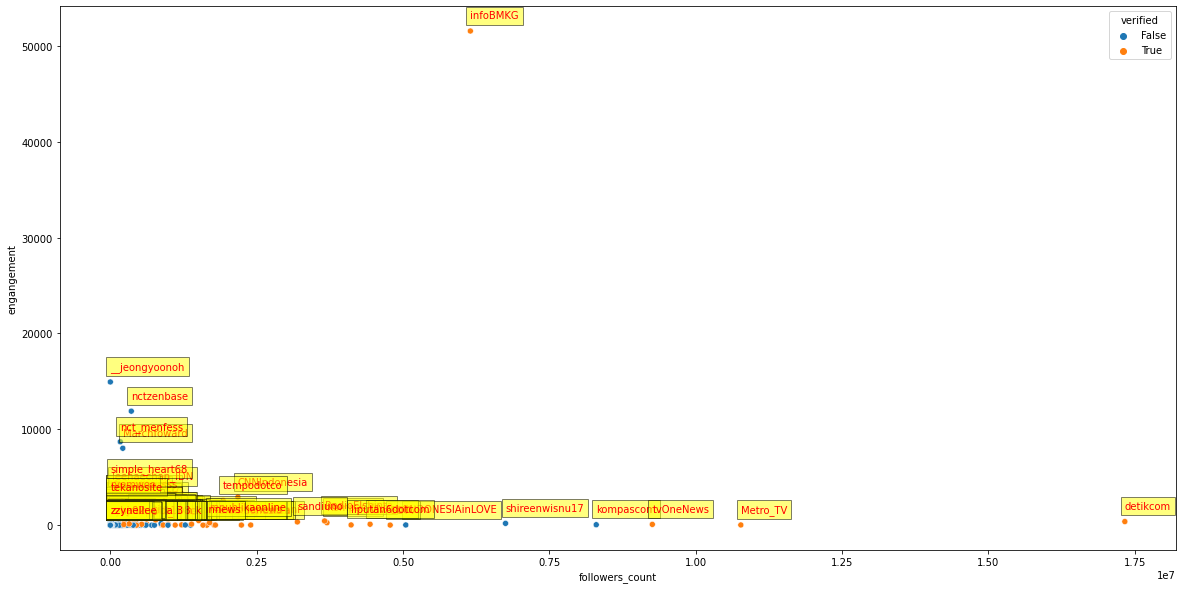

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
p = sns.scatterplot(x='followers_count', y='engangement', hue = 'verified', data = per_akun)
for i in range(per_akun.shape[0]):
     plt.text(x=per_akun.followers_count[i]+0.3,y=per_akun.engangement[i]+1300,s=per_akun.index[i], 
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Kami menggunakan banyak retweet dan favorit sebagai parameter engagement dari tweet yang mengandung keyword gempa. Berikut chart yang memperlihatkan hubungan antara engagement tweet dengan total follower akun yang ada pada data kami dengan jingga sebagai indikator akun verified dan biru sebagai akun tidak verified. Diperoleh bahwa kebanyakan akun verified yang  membicarakan masalah gempa cenderung tidak mendapat engagement yang cukup baik. Hal ini dapat dilihat bahwa hanya akun infoBMKG saja yang memiliki engagement yang paling banyak, berbeda dengan kanal berita verified lainnya

Sebagai contoh, kita ambil dua akun saja sebagai perbandingan, yaitu info BMKG dan detikcom. Jumlah followers akun @InfoBMKG memiliki jumlah followers yang cukup jauh berbeda dari jumlah followers akun @detikcom, tetapi jumlah engagement yang didapat oleh akun @infoBMKG jauh lebih tinggi dibandingkan dengan akun @detikcom. Hal ini diduga karena sebagian besar pengguna twitter cenderung lebih sering mencari atau mendapatkan informasi gempa melalui badan resmi yang memberikan informasi mengenai hal tersebut daripada melalui akun yang memberikan informasi tentang berita aktual.

Alasan akun verified menjadi perhatian kami adalah karena berita yang disampaikan oleh akun verified diasumsikan memiliki tingkat kredibilitas yang lebih tinggi ketimbang akun yang tidak verified. Bila diperhatikan lebih jeli, terdapat beberapa akun yang tidak verified tapi mendapat engagement yang cukup besar, kira-kira apa sih informasi yang disampaikan oleh akun tersebut(sehingga menerima engagement yang cenderung lebih baik ketimbang kanal berita verified lainnya)? Bila informasi yang terkandung adalah hoax atau ujaran kebencian, maka dapat memberi dampak negatif bagi siapapun yang membacanya.

Oleh karena itu, kami mengecek tweet dari akun tersebut, ternyata kami dapatkan informasi bahwa mereka mengkritik salah satu boyband yang menyanyikan lagu berjudul “earthquake” saat gempa baru saja terjadi di Jeju-do, KorSel. Nah, Engagement yang ada ternyata lebih bergantung pada topik yang berhubungan dengan kpop ketimbang gempa. Sehingga wajar bila tweetan ini bisa memiliki engagement yang cukup besar karena perilaku ini didukung oleh banyaknya masyarakat dunia maupun indo yang peduli dan cinta dengan k-pop. 

Berikut juga merupakan bukti pendukung bahwa topik berbasis korea sangat diminati oleh masyarakat twitter

In [416]:
top_tweet = df.sort_values('engangement', ascending = False)[['full_text','screen_name','retweet_count','favorite_count','engangement','date']].head(10).reset_index().copy()

In [418]:
top_tweet

index                                          full_text    screen_name  \
0  12705  #Peringatan Dini Tsunami di SULSEL,NTT,SULTRA,...       infoBMKG   
1  11290  #Peringatan dini TSUNAMI yang disebabkan oleh ...       infoBMKG   
2   5941  Gue batu jelasin kenapa mark johnny doyoung mi...  __jeongyoonoh   
3   8850  Peringatan Dini #Tsunami untuk wilayah: MALUKU...       infoBMKG   
4   6477  neozen jadi tadi di korea lagi gempa, dan yang...     nctzenbase   
5  37663  #Gempa Mag:5.1, 16-Des-21 06:01:33 WIB, Lok:8....       infoBMKG   
6  12598  #Pemutakhiran,Peringatan Dini Tsunami di NTT, ...       infoBMKG   
7   2582  Jadi tadi di Korea itu lagi gempa guys &amp; p...    nct_menfess   
8   3619  TERKINI\n\nAmaran Tsunami dikeluarkan berikuta...    Marchfoward   
9  12820  #Gempa Mag:5.3, 13-Des-21 12:46:56 WIB, Lok:9....       infoBMKG   

   retweet_count  favorite_count  engangement        date  
0          17680           33881        51561  2021-12-14  
1           3893           13594        17487  2021-12-14  
2           1603           13341        14944  2021-12-14  
3           4977            9633        14610  2021-12-14  
4           1009           10888        11897  2021-12-14  
5           2673            7560        10233  2021-12-15  
6           3327            6626         9953  2021-12-14  
7            794            7911         8705  2021-12-14  
8           2667            5359         8026  2021-12-14  
9           1256            3923         5179  2021-12-13

Berikut kami tampilkan isi cuitan yang memiliki engagement tertinggi, seperti yang sudah kami jelaskan sebelumnya, infobmkg memberikan informasi tentang kemungkinan terjadi tsunami di NTT dan sekitarnya terkait besarnya magnitudo gempa berskala 7.4-7.5 sr serta ada akun non verified yang sepertinya penggemar budaya korea sedang  membicarakan gempa yang terjadi di korea. Tingginya engagement akun non verified ini dinilai masuk akal karena banyaknya penggemar budaya korea di seluruh dunia maupun indonesia, sehingga mudah menarik perhatian masyarakat twitter pecinta budaya korea.

In [458]:
top_influence = df.groupby('screen_name').agg('median').sort_values('engangement', ascending = False)[['engangement', 'followers_count']].head(5)

In [459]:
top_influence

engangement  followers_count
screen_name                                 
nct_menfess          8705.0         170645.0
Marchfoward          8026.0         213404.0
simple_heart68       4329.0           8339.0
leehaechan_IDN       3554.0          21831.0
ryemwoo              2681.0           1223.0

In [460]:
df[df['screen_name']=='infoBMKG']['engangement'].median()

226.0

Kemudian kami tampilkan 5 akun teratas dengan influence yang cukup besar atau dapat dikatakan akun dengan engagement yang tinggi secara keseluruhan. Dibandingkan dengan top tweet sebelumnya, akun @infobmkg tidak termasuk ke dalam top influencer. Hal ini diduga karena akun resmi tersebut hanya mendapatkan engagement yang tinggi ketika memberikan informasi tentang kejadian penting mengenai gempa saja (median engagementnya hanya 226), sehingga tidak semua tweet mengenai gempa mendapatkan engagement yang tinggi (hanya tweet mengenai kejadian gempa besar saja)

sedangkan akun-akun top 5 influencer mendapatkan engagement yang besar dalam semua tweet mereka yang membahas gempa.

In [442]:
def my_fmt(x):
    return '{:.1f}%\n{:.0f} engagement'.format(x, 27295*x/100)

Text(0, 0.5, '')

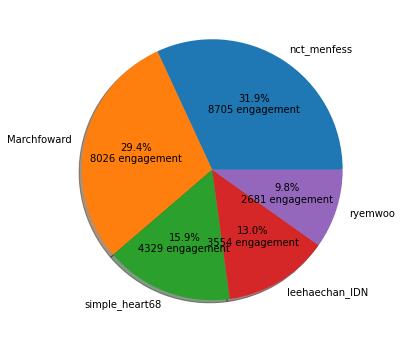

In [450]:
pie, ax = plt.subplots(figsize=[10,6])
ax=top_influence['engangement'].head(5).plot(kind='pie', shadow=True, autopct=my_fmt)
ax.set_ylabel('')

Hal ini juga memberikan informasi bahwa tidak perlu akun besar atau verified untuk mendapatkan engagement yang tinggi, dimana hanya perlu mengikuti tren untuk membahas kejadian yang sedang hangat untuk mendapatkan engagement yang besar

Seperti yang telah dicurigai terdapat sebuah kejadian (gempa) di tanggal 14, karena pola tersebut, kelompok kami memutuskan untuk membagi 3 jendela waktu,

1. pra-gempa : tanggal 6 - 13
2. gempa : tanggal 14
3. pasca gempa : tanggal 15 - 17

akan dibuat kolom baru yaitu `timeline` sebagai penanda timeline setiap tweet

In [60]:
def tentukan_timeline(x):
    if x < datetime.date(2021,12,14):
        return "pra-gempa"
    elif x == datetime.date(2021,12,14):
        return "gempa"
    else:
        return "pasca-gempa"

In [61]:
df['timeline'] = df['date'].apply(lambda x: tentukan_timeline(x))

In [62]:
df.head()

id_str                                          full_text  \
0  1470783716444278784  Berlibur di Lombok saat Gempa, Teuku Wisnu dan...   
1  1470783596852088842  @butjiners Yang di NTT noh gempa pada sakit bl...   
2  1470783571736604678  Butuh Bantuan Segera: ACT Ajak Peduli Korban G...   
3  1470783537053933568                          @mbakhutao Gempa aman ga?   
4  1470783317003976704           Ternyata, gempa tadi berasa ampe kesini.   

   retweet_count  favorite_count    screen_name         location  \
0              0               0  1nserttranstv        Indonesia   
1              0               0   Thaharizieq3  legok,tangerang   
2              0               0     gontornews        Indonesia   
3              0               0       ckdlfemm           He/Him   
4              0               0    siemplicity        Verheven.   

   followers_count  verified        date timestamp  mention  engangement  \
0           889797     False  2021-12-14  15:52:18    False            0   
1                6     False  2021-12-14  15:51:49     True            0   
2             5528     False  2021-12-14  15:51:43    False            0   
3               51     False  2021-12-14  15:51:35     True            0   
4              346     False  2021-12-14  15:50:43    False            0   

                                                text timeline  
0         berlibur lombok gempa teuku wisnu keluarga    gempa  
1                    ntt noh gempa sakit blokkkkkkkk    gempa  
2  butuh bantuan act ajak peduli korban gempa mal...    gempa  
3                                   gempa aman tidak    gempa  
4                                gempa berasa kesini    gempa

In [63]:
df['timeline'].value_counts()

gempa          10438
pasca-gempa     5410
pra-gempa       3803
Name: timeline, dtype: int64

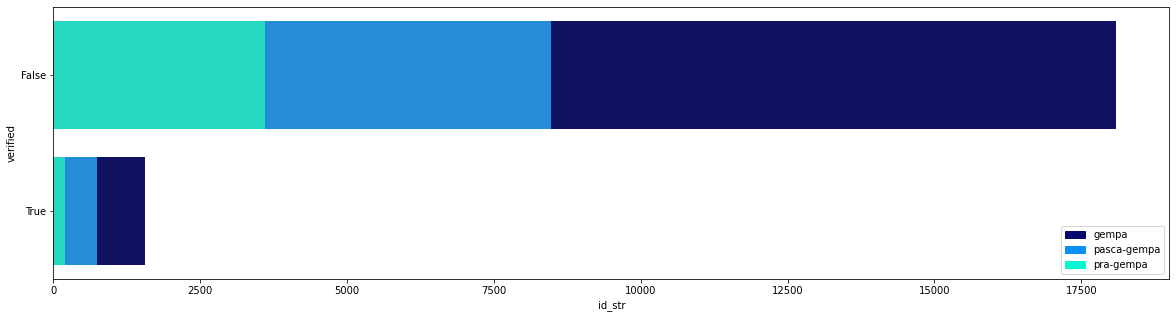

In [64]:
plt.figure(figsize=(20,5))

total = df.groupby('verified')['id_str'].count().reset_index()
bar1 = sns.barplot(y='verified',  x='id_str', data=total, color='#05056F', orient = 'h')

pascagempa = df[(df.timeline=='pasca-gempa')|(df.timeline=='pra-gempa')].groupby('verified')['id_str'].count().reset_index()
bar2 = sns.barplot(y='verified',  x='id_str', data=pascagempa, color='#0691F7', orient = 'h')

pragempa = df[df.timeline=='pra-gempa'].groupby('verified')['id_str'].count().reset_index()
bar3 = sns.barplot(y='verified',  x='id_str', data=pragempa, color='#06F7D2', orient = 'h')

top_bar = mpatches.Patch(color='#05056F', label='gempa')
middle_bar = mpatches.Patch(color='#0691F7', label='pasca-gempa')
bottom_bar = mpatches.Patch(color='#06F7D2', label='pra-gempa')
plt.legend(handles=[top_bar, middle_bar, bottom_bar])

plt.show()

Dari plot ini, terlihat bahwa akun verified melakukan tweet pada timeline gempa dan pasca gempa, karena terlihat pada kondisi pragempa, tweet yang dibuat hanya sedikit. saat terdapat kondisi ramai, akun verified turut melakukan banyak tweet untuk memberikan 'klarifikasi' kepada masyarakat.

Sedangkan, untuk akun non-verified, volume tweet yang dilakukan cukup konstan pada pragempa dan pasca gempa, dan naik saat ada kejadian gempa

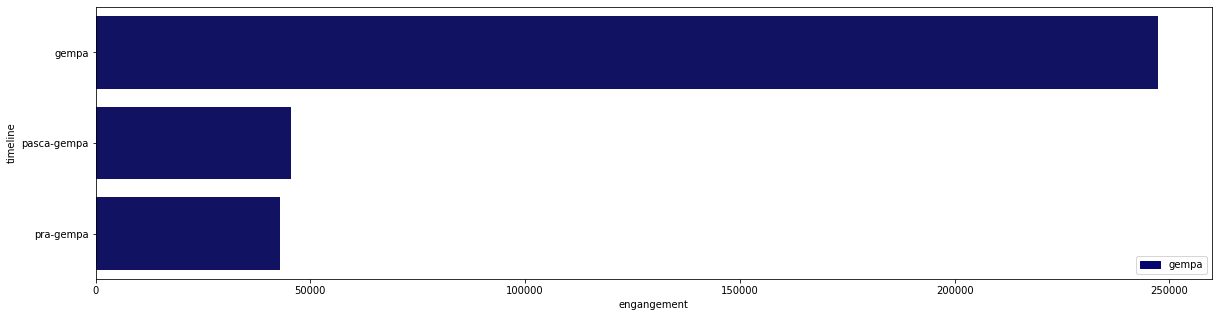

In [338]:
plt.figure(figsize=(20,5))

total = df.groupby('timeline')['engangement'].agg('sum').reset_index()
bar1 = sns.barplot(y='timeline',  x='engangement', data=total, color='#05056F', orient = 'h')

plt.legend(handles=[top_bar])

plt.show()

In [342]:
(total['engangement'][0]-total['engangement'][2])/total['engangement'][2]*100

475.42089107989955

engangement tweet dari pra-gempa ke gempa naik 475%

In [343]:
(total['engangement'][1]-total['engangement'][0])/total['engangement'][0]*100

-81.58647667849378

dari gempa ke pasca turun 82%

Dari plot ini, juga terlihat bahwa volume tweet naik turun, yaitu naik 475% dari tanggal 6-13 ke tanggal 14 serta turun 82% pada tanggal 15 - 17

Hal ini memberikan informasi bahwa animo netizen twitter sangat tinggi pada saat terjadi suatu kejadian yang trending

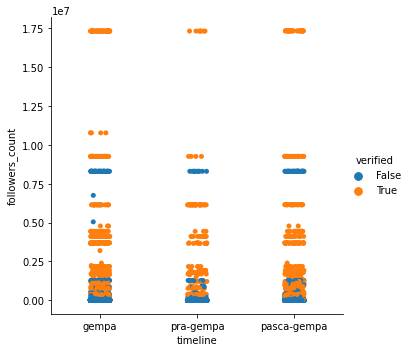

In [65]:
sns.catplot(x="timeline", y='followers_count', hue='verified',data = df)

terlihat bahwa, akun yang melakukan tweet pada masa pragempa akan selalu melakukan tweet sampai masa pasca gempa, yaitu terlihat dari garis yang merata pada `followers_count` artinya akun tersebut juga melakukan tweet pada setiap timeline

Lalu kelompok kami ingin menganalisa, apa yang dikatakan netizen twitter mengenai `gempa` ini?

### Word Cloud kata yang paling banyak dibicarakan secara keseluruhan

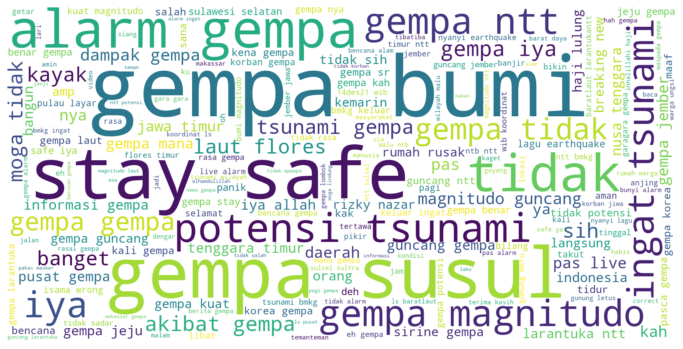

In [115]:
wc_full = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(' '.join(df['lemmatize']))
plt.figure(figsize=(12,10))
plt.imshow(wc_full, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan word cloud dapat dilihat bahwa kata-kata yang sering muncul adalah kata-kata yang menggambarkan,
1. ketakutan gempa: adanya gempa susulan, peringatan tsunami, gempa bumi, alarm
2. simpati dan keprihatinan: stay stafe, semoga tidak
3. informasi gempa: magnitudo, ntt, flores, gempa jeju, larantuka ntt


Sedangkan, tweet dari akun verified menggambarkan hal yang berbeda

In [123]:
df_verified = df[df['verified']==True]

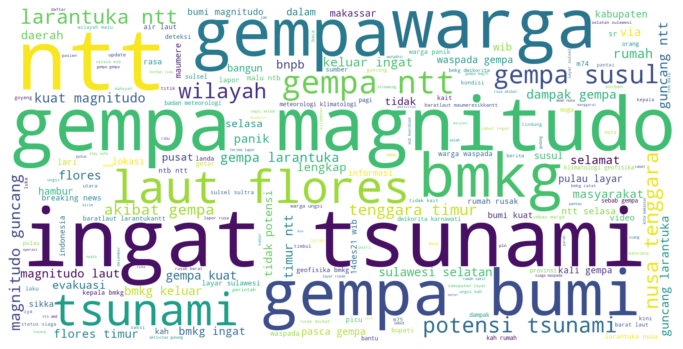

In [124]:
df_gempa = df_verified[df_verified['timeline']=="gempa"]
wc_gempa = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(' '.join(df_gempa['lemmatize']))
plt.figure(figsize=(12,10))
plt.imshow(wc_gempa, interpolation='bilinear')
plt.axis("off")
plt.show()

word cloud akun-akun verified kata “stay safe” tidak terlihat. Hal ini dapat menandakan bahwa akun-akun di luar akun verified cenderung membuat cuitan berisi “gempa” untuk memberikan support kepada orang-orang yang terkena gempa. Sedangkan akun verified cenderung memberikan informasi mengenai gempa.

informasi yang diberikan juga <i> straight to the point </i> yaitu langsung pada informasi gempa seperti dimana lokasi gempa, magnitudo, apakah terdapat potensi tsunami, gempa susulan dan lain-lain.

hal ini dirasa cukup baik karena sesuai dengan status dari akun verified tersebut, dimana memang merupakan "kewajiban" bagi akun tersebut untuk memberikan informasi yang tepat sehingga tidak menimbulkan kebingungan pada masyarakat, dimana kita mengetahui akun verified merupakan akun yang terpercaya dan tidak menimbulkan hoax.

Setelah itu, kami juga memodelkan wordcloud untuk kondisi pragempa, gempa, dan pascagempa sebagai berikut

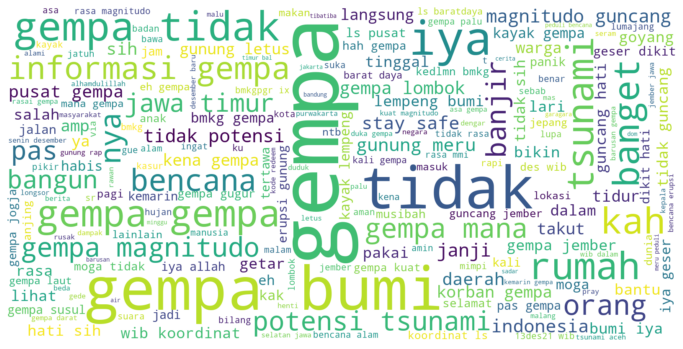

In [120]:
df_pra = df[df['timeline']=="pra-gempa"]
wc_pra = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(' '.join(df_pra['lemmatize']))
plt.figure(figsize=(12,10))
plt.imshow(wc_pra, interpolation='bilinear')
plt.axis("off")
plt.show()

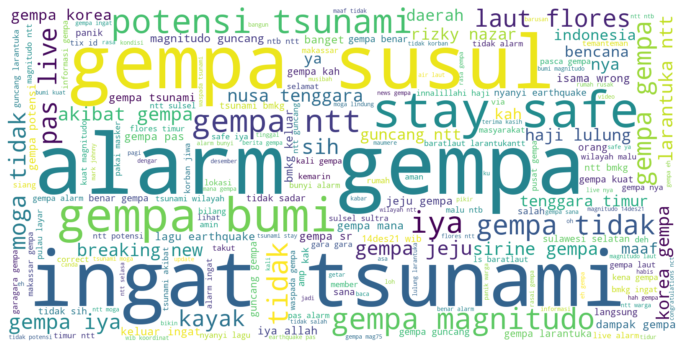

In [121]:
df_gempa = df[df['timeline']=="gempa"]
wc_gempa = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(' '.join(df_gempa['lemmatize']))
plt.figure(figsize=(12,10))
plt.imshow(wc_gempa, interpolation='bilinear')
plt.axis("off")
plt.show()

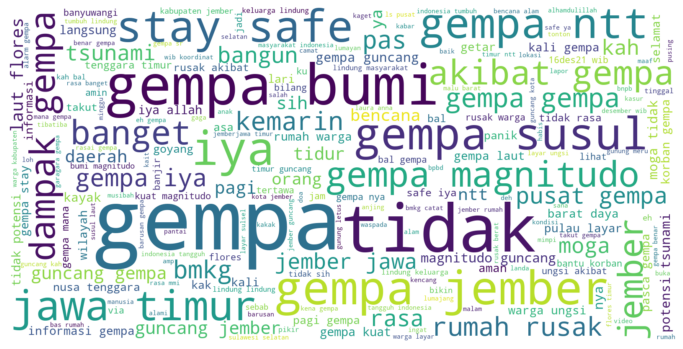

In [122]:
df_pasca = df[df['timeline']=="pasca-gempa"]
wc_pasca = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(' '.join(df_pasca['lemmatize']))
plt.figure(figsize=(12,10))
plt.imshow(wc_pasca, interpolation='bilinear')
plt.axis("off")
plt.show()

Untuk word cloud ketika pra gempa dan ketika gempa, informasi yang muncul lebih banyak mengenai peringatan peringatan, sebagai contoh, banyak muncul kata gempa,‘alarm gempa’, kemudian banyak yang nge tweet mengenai “ingat tsunami” adanya peringatan mengenai kemungkinan gempa susulan, stay safe dan lain sebagainya.
Untuk workcloud pasca gempa NTT, banyak tweets yang memberikan ucapan agar stay safe, hati-hati akan kemungkinan gempa susulan serta kita jadi tahu, selain terjadi gempa di ntt, ternyata adanya kemunculan gempa baru yang terjadi di Jember, jatim.

Selanjutnya, kami juga memetakan wordcloud berdasarkan bobot tf-idf untuk melihat kata yang paling penting.

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:
v = TfidfVectorizer()
tf_idf = v.fit_transform(df['lemmatize'])

In [161]:
tf_idf_matrix = pd.DataFrame(tf_idf.toarray(), columns = v.get_feature_names())

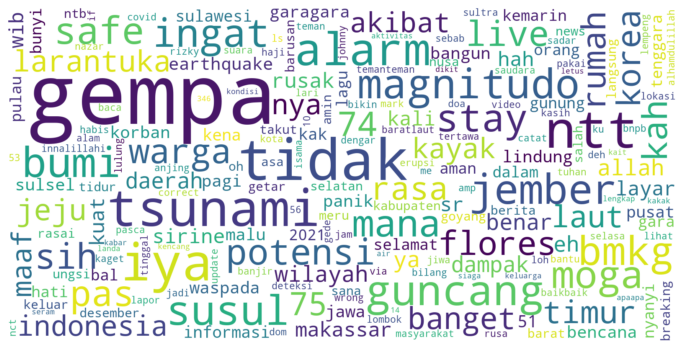

In [162]:
wc_tfidf = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate_from_frequencies(tf_idf_matrix.T.sum(axis = 1))
plt.figure(figsize=(12,10))
plt.imshow(wc_tfidf, interpolation='bilinear')
plt.axis("off")
plt.show()

Dengan bobot tf-idf, terlihat bahwa bobot kata yang paling besar adalah gempa, serta kata-kata lain yang memiliki bobot hampir mirip yaitu

tsunami, guncang, magnitudo dan lain-lain

terdapat indikator skala richter gempa yang tergambarkan juga pada wordcloud, dimana hal ini menjadi informasi yang cukup penting yaitu gempa sebesar 7.5 SR yang terjadi

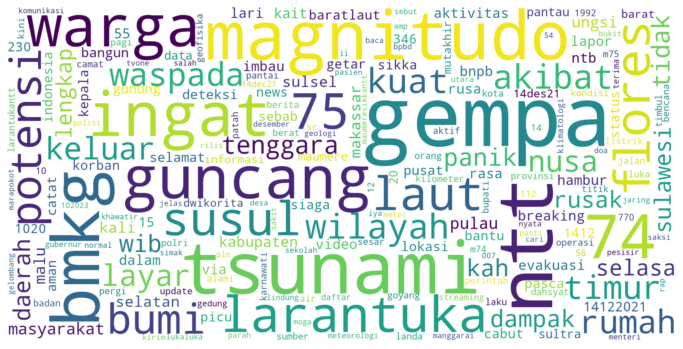

In [163]:
v = TfidfVectorizer()
tf_idf = v.fit_transform(df_gempa['lemmatize'])
tf_idf_matrix = pd.DataFrame(tf_idf.toarray(), columns = v.get_feature_names())
wc_tfidf = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate_from_frequencies(tf_idf_matrix.T.sum(axis = 1))
plt.figure(figsize=(12,10))
plt.imshow(wc_tfidf, interpolation='bilinear')
plt.axis("off")
plt.show()

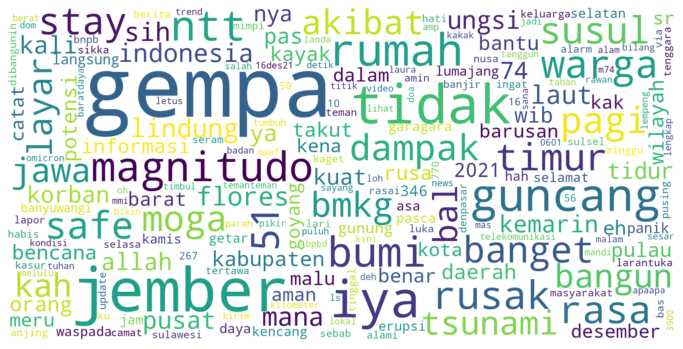

In [164]:
v = TfidfVectorizer()
tf_idf = v.fit_transform(df_pasca['lemmatize'])
tf_idf_matrix = pd.DataFrame(tf_idf.toarray(), columns = v.get_feature_names())
wc_tfidf = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate_from_frequencies(tf_idf_matrix.T.sum(axis = 1))
plt.figure(figsize=(12,10))
plt.imshow(wc_tfidf, interpolation='bilinear')
plt.axis("off")
plt.show()

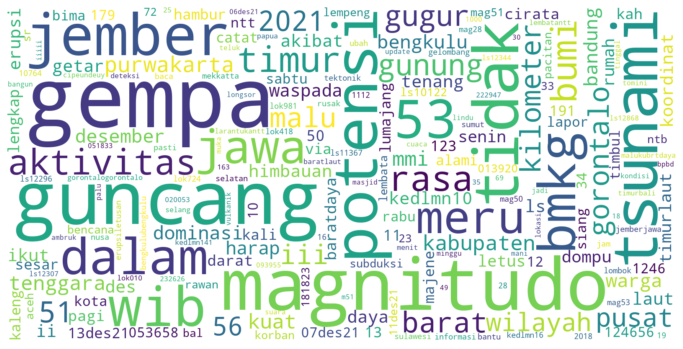

In [165]:
v = TfidfVectorizer()
tf_idf = v.fit_transform(df_pra['lemmatize'])
tf_idf_matrix = pd.DataFrame(tf_idf.toarray(), columns = v.get_feature_names())
wc_tfidf = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate_from_frequencies(tf_idf_matrix.T.sum(axis = 1))
plt.figure(figsize=(12,10))
plt.imshow(wc_tfidf, interpolation='bilinear')
plt.axis("off")
plt.show()

Jika dilihat berdasarkan bobot tf-idf, semua kondisi / timeline menyatakan hal yang hampir mirip yaitu memberikan informasi penting gempa yang terjadi yaitu guncang, magnitudo, tsunami, lokasi (jember, flores, jeju, dll), indikator gempa (7,5; 5,3 SR)

## CLustering akun menggunakan kmeans berdasarkan engangement yang diperoleh

Kami berupaya untuk mengklaster data menggunakan metode k-means dengan tujuan melihat kelompok akun yang sekiranya influential berdasarkan jumlah retweet, likes, engagement, dan followers

In [166]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [268]:
df_gempa = df[df['timeline']=="gempa"]

In [269]:
influential_gempa = df_gempa[['screen_name','retweet_count', 'favorite_count','engangement','followers_count']].copy()
influential_gempa.set_index('screen_name', inplace = True)

In [234]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [270]:
cols = influential_gempa.columns
ms = MinMaxScaler()

X = ms.fit_transform(influential_gempa)
X = pd.DataFrame(X, columns=[cols])

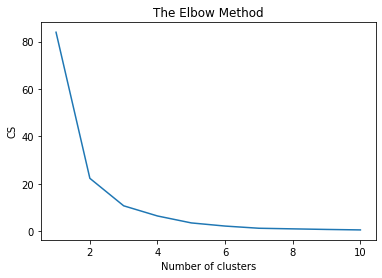

In [271]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [272]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [273]:
df_gempa['cluster'] = kmeans.labels_

C:\Users\Kevin Prawira\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [274]:
df_gempa['cluster'].value_counts()

0    10278
1      160
Name: cluster, dtype: int64

In [275]:
df_gempa.groupby('cluster').agg('median')

id_str  retweet_count  favorite_count  followers_count  \
cluster                                                                 
0        1.470673e+18            0.0             0.0            569.5   
1        1.470642e+18            3.0             7.0        9254804.0   

         verified  mention  engangement  total_tfidf  
cluster                                               
0             0.0      0.0          0.0     2.724768  
1             1.0      0.0          9.0     2.823383

Karakteristik klaster adalah sebagai berikut. 

klaster 1 adalah klaster dengan followers dan engagement rendah, sedangkan klaster 2 memiliki followers serta engagement yang tinggi. Tetapi yang perlu diperhatikan adalah bobot tf idf keduanya tidak begitu berbeda. Hal ini menunjukkan bahwa sebuah tweet yang penting tidak selalu datang dari akun yang memiliki followers dan engagement tinggi. Sehingga setiap tweet tetap memiliki esensi apabila isinya berupa informasi yang penting.

In [289]:
cluster1 = df_gempa[df_gempa['cluster']==0].copy()
cluster2 = df_gempa[df_gempa['cluster']==1].copy()

In [290]:
cluster1 = cluster1[['screen_name','engangement']].copy()
cluster1 = cluster1.groupby('screen_name').agg('sum')

In [291]:
cluster2 = cluster2[['screen_name','engangement']].copy()
cluster2 = cluster2.groupby('screen_name').agg('sum')

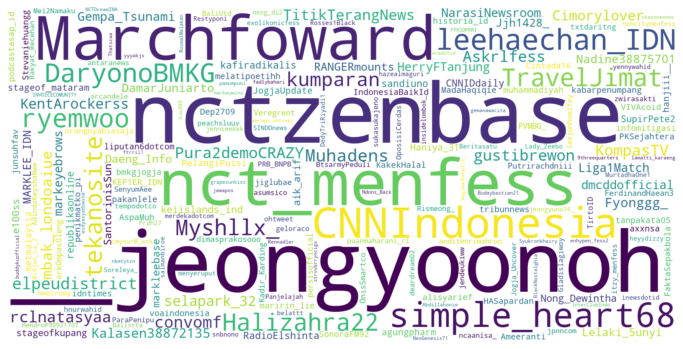

In [293]:
wc_c1gempa = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate_from_frequencies(cluster1['engangement'])
plt.figure(figsize=(12,10))
plt.imshow(wc_c1gempa, interpolation='bilinear')
plt.axis("off")
plt.show()

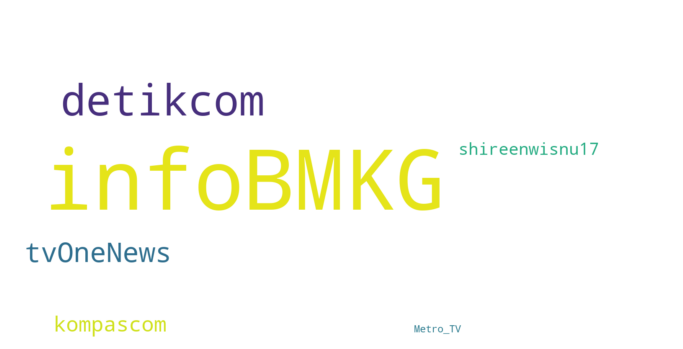

In [294]:
wc_c2gempa = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate_from_frequencies(cluster2['engangement'])
plt.figure(figsize=(12,10))
plt.imshow(wc_c2gempa, interpolation='bilinear')
plt.axis("off")
plt.show()

Kemudian berdasarkan hasil clustering, ternyata ada beberapa kanal berita verified yang cukup terkenal seperti cnnindonesia, kumparan, Narasi Newsroom, Kompas TV dan lain-lain yang tidak tergabung ke dalam klaster 2. Artinya berita yang mereka sampaikan dinilai cenderung kurang mendapat engagement yang tinggi dari netizen twitter. Sehingga kami merekomendasikan agar kanal berita yang dimaksud untuk memperbaiki model penyampaian beritanya, dengan meniru cara penyampaian berita yang dideliver oleh akun-akun pada klaster 1.

Dari cluster 1 juga terlihat akun-akun yang cukup influential, yaitu akun-akun dengan base k-pop / korea, dan sekali lagi membuktikan basis korea merupakan hal yang sangat diminati oleh warga Indonesia, menutupi informasi lokal Indonesia itu sendiri.

Dan sebagai rekomendasi juga, kami merekomendasikan untuk mempercayai akun-akun berita pada cluster 2 karena memberikan berita yang kredibel. serta akun-akun berita tersebut diharapkan dapat mempertahankan informasi yang diberikan karena status mereka yang sangat dipercayai oleh masyarakat.